In [57]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib
from time import time

In [58]:
df = pd.read_csv("iris.csv")

In [59]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

# Exploratory Data Analysis

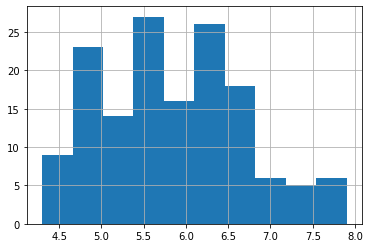

In [61]:
df["sepal.length"].hist()

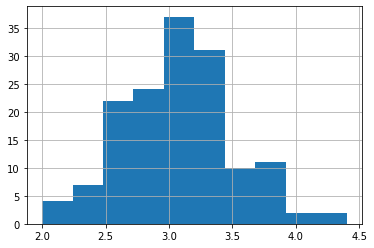

In [62]:
df["sepal.width"].hist()

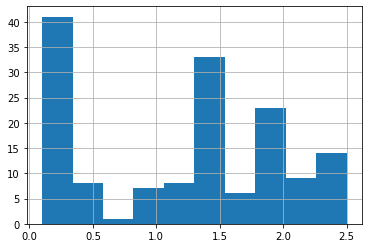

In [63]:
df["petal.width"].hist()

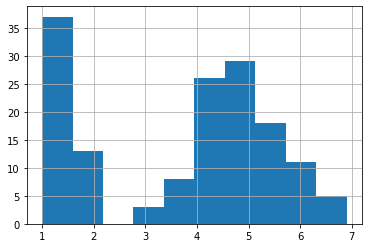

In [64]:
df["petal.length"].hist()

In [65]:
df.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


# Encode the target variable ie convert it to numeric type

In [66]:
le = LabelEncoder()

In [67]:
df['variety'] = le.fit_transform(df['variety'])
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# training, validation and test data ie 60-20-20

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
features = df.drop(columns = ['variety'] )
labels = df['variety']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.20)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train)

In [71]:
for dataset in [x_train,x_val,x_test]:
    print(len(dataset)/len(labels))

0.6
0.2
0.2


# Implement KFold Cross Validation

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()

In [73]:
scores = cross_val_score(rf,x_train,y_train.values.ravel(), cv=5)

In [74]:
scores

array([1.        , 0.94444444, 0.88888889, 0.83333333, 1.        ])

# Implement Grid Search to Random Forest

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [77]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv)


BEST PARAMS: {'max_depth': None, 'n_estimators': 5}

0.944 (+/-0.099) for {'max_depth': 2, 'n_estimators': 5}
0.933 (+/-0.13) for {'max_depth': 2, 'n_estimators': 50}
0.933 (+/-0.13) for {'max_depth': 2, 'n_estimators': 100}
0.922 (+/-0.133) for {'max_depth': 10, 'n_estimators': 5}
0.933 (+/-0.13) for {'max_depth': 10, 'n_estimators': 50}
0.933 (+/-0.13) for {'max_depth': 10, 'n_estimators': 100}
0.944 (+/-0.099) for {'max_depth': 20, 'n_estimators': 5}
0.933 (+/-0.13) for {'max_depth': 20, 'n_estimators': 50}
0.933 (+/-0.13) for {'max_depth': 20, 'n_estimators': 100}
0.944 (+/-0.141) for {'max_depth': None, 'n_estimators': 5}
0.933 (+/-0.13) for {'max_depth': None, 'n_estimators': 50}
0.933 (+/-0.13) for {'max_depth': None, 'n_estimators': 100}


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [79]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=20)
rf1.fit(x_train, y_train.values.ravel())

rf2 = RandomForestClassifier(n_estimators=50, max_depth=10)
rf2.fit(x_train, y_train.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100, max_depth=None)
rf3.fit(x_train, y_train.values.ravel())

RandomForestClassifier()

In [80]:
joblib.dump(cv.best_estimator_, 'E:/AI and ML/Archit - Machine Learning Framework/ass/RF_model.pkl')

['E:/AI and ML/Archit - Machine Learning Framework/ass/RF_model.pkl']

# Implement Grid Search to Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [82]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [83]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1}

0.667 (+/-0.122) for {'C': 0.001}
0.878 (+/-0.191) for {'C': 0.01}
0.9 (+/-0.147) for {'C': 0.1}
0.933 (+/-0.13) for {'C': 1}
0.933 (+/-0.13) for {'C': 10}
0.933 (+/-0.083) for {'C': 100}
0.933 (+/-0.083) for {'C': 1000}


In [84]:
cv.best_estimator_

LogisticRegression(C=1, max_iter=1000)

In [85]:
joblib.dump(cv.best_estimator_, 'E:/AI and ML/Archit - Machine Learning Framework/ass/LR_model.pkl')

['E:/AI and ML/Archit - Machine Learning Framework/ass/LR_model.pkl']

# Implement Grid Search to Support Vector Machine

In [86]:
from sklearn.svm import SVC

In [87]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [88]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.956 (+/-0.109) for {'C': 0.1, 'kernel': 'linear'}
0.711 (+/-0.083) for {'C': 0.1, 'kernel': 'rbf'}
0.967 (+/-0.089) for {'C': 1, 'kernel': 'linear'}
0.956 (+/-0.109) for {'C': 1, 'kernel': 'rbf'}
0.933 (+/-0.083) for {'C': 10, 'kernel': 'linear'}
0.944 (+/-0.099) for {'C': 10, 'kernel': 'rbf'}


In [89]:
cv.best_estimator_

SVC(C=1, kernel='linear')

In [90]:
joblib.dump(cv.best_estimator_, 'E:/AI and ML/Archit - Machine Learning Framework/ass/SVM_model.pkl')

['E:/AI and ML/Archit - Machine Learning Framework/ass/SVM_model.pkl']

In [91]:
pred=cv.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0 13]]


# Loading Models

In [92]:
models = {}

for mdl in ['LR', 'SVM', 'RF']:
    models[mdl] = joblib.load('E:/AI and ML/Archit - Machine Learning Framework/ass/{}_model.pkl'.format(mdl))

In [93]:
models

{'LR': LogisticRegression(C=1, max_iter=1000),
 'SVM': SVC(C=1, kernel='linear'),
 'RF': RandomForestClassifier(n_estimators=5)}

# Analyze the results on Validation set

In [94]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred,average="weighted"), 3)
    recall = round(recall_score(labels, pred,average="weighted"), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [95]:
for name, mdl in models.items():
    evaluate_model(name, mdl, x_val, y_val)

LR -- Accuracy: 0.967 / Precision: 0.971 / Recall: 0.967 / Latency: 2.5ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.5ms
RF -- Accuracy: 0.967 / Precision: 0.971 / Recall: 0.967 / Latency: 5.1ms


# Analyze the results on Test set

In [96]:
for name, mdl in models.items():
    evaluate_model(name, mdl, x_test, y_test)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 6.5ms
RF -- Accuracy: 0.967 / Precision: 0.97 / Recall: 0.967 / Latency: 9.2ms


# training, validation and test data ie 80-10-10

In [97]:
x_tr, x_te, y_tr, y_te = train_test_split(features,labels,test_size=0.20)
x_te, x_v, y_te, y_v = train_test_split(x_te,y_te,test_size=0.5)

In [98]:
for dataset in [x_tr, x_v, x_te]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.1
0.1


# Implement KFold Cross Validation

In [99]:
rf = RandomForestClassifier()
scores = cross_val_score(rf,x_tr,y_tr.values.ravel(), cv=5)
scores

array([0.91666667, 0.95833333, 1.        , 0.95833333, 0.95833333])

# Implement Grid Search to Random Forest

In [100]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(x_tr, y_tr.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 100}

0.942 (+/-0.067) for {'max_depth': 2, 'n_estimators': 5}
0.967 (+/-0.033) for {'max_depth': 2, 'n_estimators': 50}
0.975 (+/-0.041) for {'max_depth': 2, 'n_estimators': 100}
0.967 (+/-0.033) for {'max_depth': 10, 'n_estimators': 5}
0.958 (+/-0.0) for {'max_depth': 10, 'n_estimators': 50}
0.967 (+/-0.033) for {'max_depth': 10, 'n_estimators': 100}
0.958 (+/-0.0) for {'max_depth': 20, 'n_estimators': 5}
0.95 (+/-0.033) for {'max_depth': 20, 'n_estimators': 50}
0.967 (+/-0.033) for {'max_depth': 20, 'n_estimators': 100}
0.95 (+/-0.082) for {'max_depth': None, 'n_estimators': 5}
0.958 (+/-0.053) for {'max_depth': None, 'n_estimators': 50}
0.958 (+/-0.053) for {'max_depth': None, 'n_estimators': 100}


In [101]:
joblib.dump(cv.best_estimator_, 'E:/AI and ML/Archit - Machine Learning Framework/ass/80-10-10/RF_model.pkl')

['E:/AI and ML/Archit - Machine Learning Framework/ass/80-10-10/RF_model.pkl']

# Implement Grid Search to Logistic Regression

In [102]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(x_tr, y_tr.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1}

0.792 (+/-0.19) for {'C': 0.001}
0.867 (+/-0.122) for {'C': 0.01}
0.967 (+/-0.033) for {'C': 0.1}
0.975 (+/-0.041) for {'C': 1}
0.958 (+/-0.053) for {'C': 10}
0.95 (+/-0.082) for {'C': 100}
0.95 (+/-0.082) for {'C': 1000}


In [103]:
cv.best_estimator_

LogisticRegression(C=1, max_iter=1000)

In [104]:
joblib.dump(cv.best_estimator_, 'E:/AI and ML/Archit - Machine Learning Framework/ass/80-10-10/LR_model.pkl')

['E:/AI and ML/Archit - Machine Learning Framework/ass/80-10-10/LR_model.pkl']

# Implement Grid Search to Support Vector Machine

In [105]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(x_tr, y_tr.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'rbf'}

0.975 (+/-0.041) for {'C': 0.1, 'kernel': 'linear'}
0.925 (+/-0.062) for {'C': 0.1, 'kernel': 'rbf'}
0.975 (+/-0.041) for {'C': 1, 'kernel': 'linear'}
0.983 (+/-0.041) for {'C': 1, 'kernel': 'rbf'}
0.967 (+/-0.033) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.041) for {'C': 10, 'kernel': 'rbf'}


In [106]:
cv.best_estimator_

SVC(C=1)

In [107]:
joblib.dump(cv.best_estimator_, 'E:/AI and ML/Archit - Machine Learning Framework/ass/80-10-10/SVM_model.pkl')

['E:/AI and ML/Archit - Machine Learning Framework/ass/80-10-10/SVM_model.pkl']

In [108]:
pred=cv.predict(x_te)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_te,pred))

[[6 0 0]
 [0 5 0]
 [0 0 4]]


# Loading Models

In [109]:
model1 = {}

for mdl in ['LR', 'SVM', 'RF']:
    model1[mdl] = joblib.load('E:/AI and ML/Archit - Machine Learning Framework/ass/80-10-10/{}_model.pkl'.format(mdl))

In [110]:
model1

{'LR': LogisticRegression(C=1, max_iter=1000),
 'SVM': SVC(C=1),
 'RF': RandomForestClassifier(max_depth=2)}

# Analyze the results on Validation set

In [111]:
for name, mdl in model1.items():
    evaluate_model(name, mdl, x_v, y_v)

LR -- Accuracy: 0.867 / Precision: 0.867 / Recall: 0.867 / Latency: 2.6ms
SVM -- Accuracy: 0.933 / Precision: 0.95 / Recall: 0.933 / Latency: 4.3ms
RF -- Accuracy: 0.867 / Precision: 0.867 / Recall: 0.867 / Latency: 24.9ms


# Analyze the results on Test set

In [112]:
for name, mdl in model1.items():
    evaluate_model(name, mdl, x_te, y_te)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.1ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 29.1ms


# Analyze the results on Validation set and test set

1. Confusion matrix justifies why SVM is clear winner with high accuracy,precision,recall and low latency.
2. SVM is effective in cases where the number of dimensions is greater than the number of samples.

# Compare the performance of models on split ratio

80-10-10 split ratio has given better result due to followings:-

1. RF repeats the process multiple times and then make final prediction on each observation hence RF(80-10-10) has improved margins on scores because number of observations has been increased dur=e to increase in training set.

2. It is observed LR(60-20-20) has better scores especailly in validation dataset due to underfitting as compare to LR(80-10-10)

3. Performance scores of SVM(80-10-10) validation has given realistic results due to more training values as compare to SVM(60-20-20)
